In [44]:
import sklearn
import numpy as np
import pandas as pd
import joblib
import random
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor  # XGBoost for regression
from lightgbm import LGBMRegressor  # LightGBM for regression
from catboost import CatBoostRegressor  # CatBoost for regression
from sklearn.ensemble import AdaBoostRegressor  # AdaBoost for regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting for regression
from sklearn.ensemble import StackingRegressor  # Stacking for regression
from sklearn.model_selection import cross_val_score  # For model evaluation
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, 
    AdaBoostRegressor, ExtraTreesRegressor
)
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Additional imports
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import ipywidgets as widgets
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']


In [2]:
file_path = "/home/kumail/Energy_AI/Honey Model/Dataset/Dataset.csv"
df = pd.read_csv(file_path)
df

,Relative Concentration,Absolute Concentration,Log KOW,Log BCF,Retention Time,Log BCF old,HRI
0,36.04,0.06,-0.39,0.50,37.320,0.50,0.022
1,21.46,0.03,-0.81,0.50,18.500,0.50,0.000
2,21.60,0.08,-0.32,0.50,17.080,0.50,0.418
3,98.96,0.15,1.58,0.71,10.900,0.71,0.247
4,64.54,0.10,-0.12,0.50,5.269,0.50,0.601
...,...,...,...,...,...,...,...
134,79.25,0.20,3.41,1.92,22.146,1.92,4.674
135,10.00,0.01,-0.05,5.40,5.579,0.50,0.041
136,10.49,0.01,0.77,0.50,6.629,0.50,0.080
137,9.92,0.01,2.10,0.50,6.809,0.50,0.016


In [3]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Relative Concentration    0
Absolute Concentration    0
Log KOW                   0
Log BCF                   0
Retention Time            0
Log BCF old               0
HRI                       0
dtype: int64


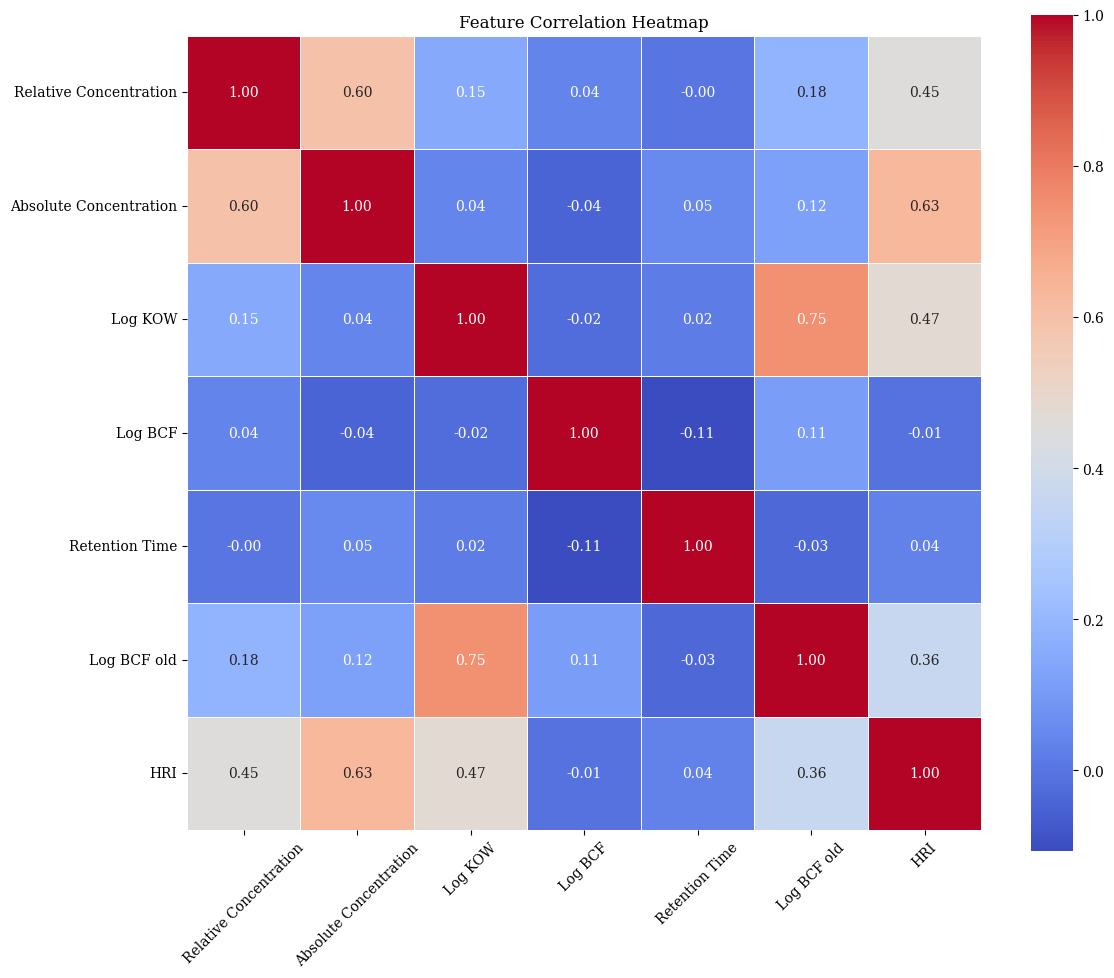

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [5]:
Y = df['HRI']
X = df.drop(["HRI"], axis=1)
X

,Relative Concentration,Absolute Concentration,Log KOW,Log BCF,Retention Time,Log BCF old
0,36.04,0.06,-0.39,0.50,37.320,0.50
1,21.46,0.03,-0.81,0.50,18.500,0.50
2,21.60,0.08,-0.32,0.50,17.080,0.50
3,98.96,0.15,1.58,0.71,10.900,0.71
4,64.54,0.10,-0.12,0.50,5.269,0.50
...,...,...,...,...,...,...
134,79.25,0.20,3.41,1.92,22.146,1.92
135,10.00,0.01,-0.05,5.40,5.579,0.50
136,10.49,0.01,0.77,0.50,6.629,0.50
137,9.92,0.01,2.10,0.50,6.809,0.50


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[3.60828931e-01, 7.14285714e-02, 1.03878116e-01, 1.57480315e-02,
        9.81462413e-02, 5.45454545e-02],
       [2.12718407e-01, 3.57142857e-02, 7.47922438e-02, 1.57480315e-02,
        4.09813409e-02, 5.45454545e-02],
       [2.14140593e-01, 9.52380952e-02, 1.08725762e-01, 1.57480315e-02,
        3.66681550e-02, 5.45454545e-02],
       [1.00000000e+00, 1.78571429e-01, 2.40304709e-01, 4.33070866e-02,
        1.78966840e-02, 1.50000000e-01],
       [6.50345388e-01, 1.19047619e-01, 1.22576177e-01, 1.57480315e-02,
        7.92775717e-04, 5.45454545e-02],
       [6.09508330e-02, 1.19047619e-02, 7.47922438e-02, 1.57480315e-02,
        2.73370937e-04, 5.45454545e-02],
       [3.27102804e-02, 0.00000000e+00, 7.47922438e-02, 1.57480315e-02,
        6.11348539e-02, 5.45454545e-02],
       [5.70296627e-01, 8.33333333e-02, 1.22576177e-01, 1.57480315e-02,
        1.58333409e-01, 5.45454545e-02],
       [2.47866721e-02, 0.00000000e+00, 2.15373961e-01, 1.31233596e-02,
        1.00000000e+00, 

In [7]:
from sklearn.model_selection import train_test_split
def split_and_scale_data(X, Y, test_size=0.10, random_state=42):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"After preprocessing Training set size: {X_train.shape}")
    print(f"After preprocessing Test set size: {X_test.shape}")
    
    
    return X_train, X_test, Y_train,  Y_test
X_train_scaled,  X_test_scaled, Y_train,  Y_test = split_and_scale_data(data_scaled, Y)

Training set size: 125
Test set size: 14
After preprocessing Training set size: (125, 6)
After preprocessing Test set size: (14, 6)


### Gradient Boosting

In [112]:
GB_model = GradientBoostingRegressor(
        n_estimators=276,
        max_depth=2,
        learning_rate=0.17134559325939266,
        subsample=0.778523288395023
    )
GB_model.fit(X_train_scaled, Y_train)
GB_y_pred =GB_model.predict( X_test_scaled)
r2 = r2_score(Y_test, GB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, GB_y_pred))
mae = mean_absolute_error(Y_test, GB_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
joblib.dump(GB_model, "/home/kumail/Energy_AI/Honey Model/Models/GB_model.pkl")
print("Model saved successfully.")

R²: 0.7833
RMSE: 0.1977
MAE: 0.1279
Model saved successfully.


### CV

In [197]:
cross_val_scores_r2 = cross_val_score(GB_model, X_train_scaled, Y_train, cv=5, scoring='r2')
cross_val_predictions = cross_val_predict(GB_model, X_test_scaled, Y_test)

# Calculate R², RMSE, and MAE for cross-validation
r2 = np.mean(cross_val_scores_r2)
rmse = np.sqrt(mean_squared_error(Y_test, cross_val_predictions))
mae = mean_absolute_error(Y_test, cross_val_predictions)

# Print R² for each fold
print("R² for each fold: ", cross_val_scores_r2)

# Print overall metrics
print(f"Cross-validated R² (mean): {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² for each fold:  [  0.58412986   0.20169249 -10.77472342   0.38415423   0.48075328]
Cross-validated R² (mean): -1.8248
RMSE: 0.4199
MAE: 0.3219


### AdaBoost

In [83]:
AB_model = AdaBoostRegressor(
        n_estimators=76,
        learning_rate=0.6156283170323219
    )
AB_model.fit(X_train_scaled, Y_train)
AB_y_pred =AB_model.predict( X_test_scaled)
r2 = r2_score(Y_test, AB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,AB_y_pred))
mae = mean_absolute_error(Y_test, AB_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
joblib.dump(AB_model, "/home/kumail/Energy_AI/Honey Model/Models/AB_model.pkl")
print("AdaBoost Model saved successfully.")

R²: 0.7837
RMSE: 0.1975
MAE: 0.1720
AdaBoost Model saved successfully.


### CatBoost

In [118]:
CB_model = CatBoostRegressor(
        iterations=178,
        depth=8,
        learning_rate=0.22372944990771026,
        l2_leaf_reg=6.1570414722973394,
        verbose=False
    )
CB_model.fit(X_train_scaled, Y_train)
CB_y_pred =CB_model.predict( X_test_scaled)
r2 = r2_score(Y_test, CB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,CB_y_pred))
mae = mean_absolute_error(Y_test, CB_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
joblib.dump(CB_model, "/home/kumail/Energy_AI/Honey Model/Models/CB_model.pkl")
print("AdaBoost Model saved successfully.")

R²: 0.8163
RMSE: 0.1820
MAE: 0.1262
AdaBoost Model saved successfully.


### Support Vector Machine

In [121]:
SVR_model = SVR(
        C=21.122166806545753,
        epsilon=0.2105609679089486,
        kernel='linear'
    )
SVR_model.fit(X_train_scaled, Y_train)
SVR_y_pred =SVR_model.predict( X_test_scaled)
r2 = r2_score(Y_test, SVR_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,SVR_y_pred))
mae = mean_absolute_error(Y_test, SVR_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
joblib.dump(CB_model, "/home/kumail/Energy_AI/Honey Model/Models/SVR_model.pkl")
print("AdaBoost Model saved successfully.")

R²: 0.7313
RMSE: 0.2201
MAE: 0.1574
AdaBoost Model saved successfully.


### KNN

In [ ]:
KNN_model = KNeighborsRegressor(n_neighbors=  10, weights= 'distance', p= 2) 
KNN_model.fit(X_train_scaled, Y_train)
KNN_y_pred = KNN_model.predict(X_test_scaled)

r2 = r2_score(Y_test, KNN_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, KNN_y_pred))
mae = mean_absolute_error(Y_test, KNN_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

joblib.dump(KNN_model, "/home/kumail/Energy_AI/Honey Model/Models/KNN_model.pkl")
print("KNN Model saved successfully.")

R²: 0.8360
RMSE: 0.1720
MAE: 0.1264
KNN Model saved successfully.


### CV

In [201]:
cross_val_scores_r2 = cross_val_score(KNN_model, X_train_scaled, Y_train, cv=5, scoring='r2')
cross_val_predictions = cross_val_predict(KNN_model, X_test_scaled, Y_test)

# Calculate R², RMSE, and MAE for cross-validation
r2 = np.mean(cross_val_scores_r2)
rmse = np.sqrt(mean_squared_error(Y_test, cross_val_predictions))
mae = mean_absolute_error(Y_test, cross_val_predictions)

# Print R² for each fold
print("R² for each fold: ", cross_val_scores_r2)

# Print overall metrics
print(f"Cross-validated R² (mean): {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² for each fold:  [0.04144963 0.05013028 0.70630975 0.16052549 0.09874665]
Cross-validated R² (mean): 0.2114
RMSE: 0.4259
MAE: 0.2956


### XGBoost

In [ ]:
XGB_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
XGB_model.fit(X_train_scaled, Y_train)
XGB_y_pred = XGB_model.predict(X_test_scaled)

r2 = r2_score(Y_test, XGB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, XGB_y_pred))
mae = mean_absolute_error(Y_test, XGB_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
joblib.dump(XGB_model, "/home/kumail/Energy_AI/Honey Model/Models/XGB_model.pkl")
print("XGBoost Model saved successfully.")

R²: 0.2033
RMSE: 0.3791
MAE: 0.2248
XGBoost Model saved successfully.


In [202]:
cross_val_scores_r2 = cross_val_score(XGB_model, X_train_scaled, Y_train, cv=5, scoring='r2')
cross_val_predictions = cross_val_predict(XGB_model, X_test_scaled, Y_test)

# Calculate R², RMSE, and MAE for cross-validation
r2 = np.mean(cross_val_scores_r2)
rmse = np.sqrt(mean_squared_error(Y_test, cross_val_predictions))
mae = mean_absolute_error(Y_test, cross_val_predictions)

# Print R² for each fold
print("R² for each fold: ", cross_val_scores_r2)

# Print overall metrics
print(f"Cross-validated R² (mean): {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² for each fold:  [  0.5790611    0.07416188 -31.56154528   0.2900412    0.60125607]
Cross-validated R² (mean): -6.0034
RMSE: 0.4342
MAE: 0.3154


In [8]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

base_estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('ada', AdaBoostRegressor(random_state=42)),
    ('et', ExtraTreesRegressor(random_state=42)),
    ('xgb', XGBRegressor(verbosity=0, random_state=42)),
    ('lgbm', LGBMRegressor(verbose=-1, random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42)),
    ('svr', SVR())
]

final_estimator = SVR()

stacking_model = StackingRegressor(
    estimators=base_estimators, 
    final_estimator=final_estimator,
)
stacking_model.fit(X_train_scaled, Y_train )
predictions = stacking_model.predict(X_test_scaled)

r2 = r2_score(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
mae = mean_absolute_error(Y_test, predictions)

print(f"--- {'Ensemble Stacking'} ---")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

--- Ensemble Stacking ---
R²: 0.4051
RMSE: 0.3276
MAE: 0.2160


In [9]:
joblib.dump(stacking_model, "/home/kumail/Energy_AI/Honey Model/Models/stacking_model_model.pkl")
print("stacking Model saved successfully.")

stacking Model saved successfully.


### Optuna

In [44]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import optuna

# Optional: Fix randomness
SEED = 42

# Define evaluation metrics
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"--- {name} ---")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    
    return r2, rmse, mae

# OPTUNA Optimization for each model
def optimize_model(name, model_name, X_train, X_test, y_train, y_test, n_trials=50):
    def objective(trial):
        if model_name == "Gradient Boosting":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 300),
                "max_depth": trial.suggest_int("max_depth", 2, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            }
            model = GradientBoostingRegressor(**params, random_state=SEED)

        elif model_name == "AdaBoost":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 300),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0),
            }
            model = AdaBoostRegressor(**params, random_state=SEED)

        elif model_name == "CatBoost":
            params = {
                "iterations": trial.suggest_int("iterations", 50, 300),
                "depth": trial.suggest_int("depth", 3, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0)
            }
            model = CatBoostRegressor(**params, verbose=False, random_state=SEED)

        elif model_name == "KNN":
            params = {
                "n_neighbors": trial.suggest_int("n_neighbors", 1, 30),
                "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
                "p": trial.suggest_int("p", 1, 2)
            }
            model = KNeighborsRegressor(**params)

        elif model_name == "SVR":
            params = {
                "C": trial.suggest_float("C", 0.1, 100.0, log=True),
                "epsilon": trial.suggest_float("epsilon", 0.01, 1.0),
                "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
            }
            model = SVR(**params)

        else:
            raise ValueError("Unknown model")

        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        return r2_score(y_test, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    print(f"\n>>> Best R² for {model_name}: {study.best_value:.4f}")
    print(f"Best params for {model_name}: {study.best_params}\n")

    # Train the best model and evaluate it
    best_params = study.best_params
    if model_name == "Gradient Boosting":
        model = GradientBoostingRegressor(**best_params, random_state=SEED)
    elif model_name == "AdaBoost":
        model = AdaBoostRegressor(**best_params, random_state=SEED)
    elif model_name == "CatBoost":
        model = CatBoostRegressor(**best_params, verbose=False, random_state=SEED)
    elif model_name == "KNN":
        model = KNeighborsRegressor(**best_params)
    elif model_name == "SVR":
        model = SVR(**best_params)

    evaluate_model(model_name, model, X_train, X_test, y_train, y_test)

# Define model names
model_names = ["Gradient Boosting", "AdaBoost", "CatBoost", "KNN", "SVR"]

# Run optimization
for name in model_names:
    optimize_model(name, name, X_train_scaled, X_test_scaled, Y_train, Y_test)


[I 2025-04-15 14:16:24,161] A new study created in memory with name: no-name-753b86d3-7571-40be-9e8d-1e1230f0bc97
[I 2025-04-15 14:16:24,283] Trial 0 finished with value: -0.046703725418207886 and parameters: {'n_estimators': 159, 'max_depth': 2, 'learning_rate': 0.04665190709989072, 'subsample': 0.9961663338044892}. Best is trial 0 with value: -0.046703725418207886.
[I 2025-04-15 14:16:24,408] Trial 1 finished with value: 0.02509753059218911 and parameters: {'n_estimators': 193, 'max_depth': 4, 'learning_rate': 0.1643104953958705, 'subsample': 0.7107526320752003}. Best is trial 1 with value: 0.02509753059218911.
[I 2025-04-15 14:16:24,581] Trial 2 finished with value: -0.15945738048543734 and parameters: {'n_estimators': 263, 'max_depth': 7, 'learning_rate': 0.0349013544004879, 'subsample': 0.6726397704043225}. Best is trial 1 with value: 0.02509753059218911.
[I 2025-04-15 14:16:24,742] Trial 3 finished with value: -1.119487699263749 and parameters: {'n_estimators': 243, 'max_depth': 


>>> Best R² for Gradient Boosting: 0.6740
Best params for Gradient Boosting: {'n_estimators': 276, 'max_depth': 2, 'learning_rate': 0.17134559325939266, 'subsample': 0.778523288395023}



[I 2025-04-15 14:16:34,198] A new study created in memory with name: no-name-8ec4ce9d-e8c8-4945-95bf-9c73da535f29
[I 2025-04-15 14:16:34,334] Trial 0 finished with value: 0.6127625785379135 and parameters: {'n_estimators': 96, 'learning_rate': 0.4951008471978828}. Best is trial 0 with value: 0.6127625785379135.


--- Gradient Boosting ---
R²: 0.6740
RMSE: 0.2425
MAE: 0.1827


[I 2025-04-15 14:16:34,418] Trial 1 finished with value: 0.5030097811284562 and parameters: {'n_estimators': 120, 'learning_rate': 0.9821987294928755}. Best is trial 0 with value: 0.6127625785379135.
[I 2025-04-15 14:16:34,473] Trial 2 finished with value: 0.45419151345155384 and parameters: {'n_estimators': 286, 'learning_rate': 0.8240491998309243}. Best is trial 0 with value: 0.6127625785379135.
[I 2025-04-15 14:16:34,572] Trial 3 finished with value: 0.668934268429229 and parameters: {'n_estimators': 95, 'learning_rate': 0.5529953719151737}. Best is trial 3 with value: 0.668934268429229.
[I 2025-04-15 14:16:34,743] Trial 4 finished with value: 0.4813491118165242 and parameters: {'n_estimators': 220, 'learning_rate': 0.42870040696144446}. Best is trial 3 with value: 0.668934268429229.
[I 2025-04-15 14:16:34,835] Trial 5 finished with value: 0.6362035413454346 and parameters: {'n_estimators': 132, 'learning_rate': 0.8969385622279714}. Best is trial 3 with value: 0.668934268429229.
[I 


>>> Best R² for AdaBoost: 0.8299
Best params for AdaBoost: {'n_estimators': 76, 'learning_rate': 0.6156283170323219}

--- AdaBoost ---
R²: 0.8299
RMSE: 0.1751
MAE: 0.1365


[I 2025-04-15 14:16:42,302] Trial 0 finished with value: 0.20619546753044415 and parameters: {'iterations': 99, 'depth': 5, 'learning_rate': 0.13338422285012846, 'l2_leaf_reg': 1.701242954940412}. Best is trial 0 with value: 0.20619546753044415.
[I 2025-04-15 14:16:42,666] Trial 1 finished with value: 0.04420766611779403 and parameters: {'iterations': 268, 'depth': 4, 'learning_rate': 0.16093014430333552, 'l2_leaf_reg': 3.596270410287776}. Best is trial 0 with value: 0.20619546753044415.
[I 2025-04-15 14:16:42,924] Trial 2 finished with value: 0.7537936540521585 and parameters: {'iterations': 71, 'depth': 6, 'learning_rate': 0.07031950112348853, 'l2_leaf_reg': 6.011727007365834}. Best is trial 2 with value: 0.7537936540521585.
[I 2025-04-15 14:16:43,178] Trial 3 finished with value: 0.4285760752888148 and parameters: {'iterations': 175, 'depth': 3, 'learning_rate': 0.028007064738230128, 'l2_leaf_reg': 6.815860436470794}. Best is trial 2 with value: 0.7537936540521585.
[I 2025-04-15 14:


>>> Best R² for CatBoost: 0.8794
Best params for CatBoost: {'iterations': 178, 'depth': 8, 'learning_rate': 0.22372944990771026, 'l2_leaf_reg': 6.1570414722973394}



[I 2025-04-15 14:16:57,074] A new study created in memory with name: no-name-41071173-ba1a-4607-a448-87519ceb1a2b
[I 2025-04-15 14:16:57,078] Trial 0 finished with value: 0.7930275023443577 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7930275023443577.
[I 2025-04-15 14:16:57,082] Trial 1 finished with value: 0.5919690950874391 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7930275023443577.
[I 2025-04-15 14:16:57,085] Trial 2 finished with value: 0.6522589943635195 and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7930275023443577.
[I 2025-04-15 14:16:57,089] Trial 3 finished with value: 0.7591581995608472 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7930275023443577.
[I 2025-04-15 14:16:57,092] Trial 4 finished with value: 0.5874713921563293 and parameters: {'n_neighbors': 28, 'weights

--- CatBoost ---
R²: 0.8794
RMSE: 0.1475
MAE: 0.0992


[I 2025-04-15 14:16:57,281] Trial 18 finished with value: 0.7406598328082035 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 2}. Best is trial 6 with value: 0.8042226225463155.
[I 2025-04-15 14:16:57,308] Trial 19 finished with value: 0.8042226225463155 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'p': 2}. Best is trial 6 with value: 0.8042226225463155.
[I 2025-04-15 14:16:57,334] Trial 20 finished with value: -0.43878168097770986 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'p': 1}. Best is trial 6 with value: 0.8042226225463155.
[I 2025-04-15 14:16:57,361] Trial 21 finished with value: 0.8042226225463155 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'p': 2}. Best is trial 6 with value: 0.8042226225463155.
[I 2025-04-15 14:16:57,388] Trial 22 finished with value: 0.8042226225463155 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'p': 2}. Best is trial 6 with value: 0.8042226225463155.
[I 2025-04-15 14:16:57,415] Trial 23 


>>> Best R² for KNN: 0.8360
Best params for KNN: {'n_neighbors': 10, 'weights': 'distance', 'p': 2}

--- KNN ---
R²: 0.8360
RMSE: 0.1720
MAE: 0.1264


[I 2025-04-15 14:16:58,136] Trial 14 finished with value: 0.5279345268608842 and parameters: {'C': 73.97808814962704, 'epsilon': 0.05472205206233949, 'kernel': 'poly'}. Best is trial 13 with value: 0.7313025684704095.
[I 2025-04-15 14:16:58,149] Trial 15 finished with value: 0.719227529258442 and parameters: {'C': 22.40041348763771, 'epsilon': 0.18895566763206662, 'kernel': 'linear'}. Best is trial 13 with value: 0.7313025684704095.
[I 2025-04-15 14:16:58,162] Trial 16 finished with value: 0.7304452386125944 and parameters: {'C': 21.984524959709546, 'epsilon': 0.2087667006160713, 'kernel': 'linear'}. Best is trial 13 with value: 0.7313025684704095.
[I 2025-04-15 14:16:58,173] Trial 17 finished with value: 0.472227679001871 and parameters: {'C': 1.5162673163018527, 'epsilon': 0.36032263079845717, 'kernel': 'linear'}. Best is trial 13 with value: 0.7313025684704095.
[I 2025-04-15 14:16:58,186] Trial 18 finished with value: -0.301393046734004 and parameters: {'C': 13.332696886567863, 'eps


>>> Best R² for SVR: 0.7313
Best params for SVR: {'C': 21.122166806545753, 'epsilon': 0.2105609679089486, 'kernel': 'linear'}

--- SVR ---
R²: 0.7313
RMSE: 0.2201
MAE: 0.1574


### SHAP

In [203]:
import shap
explainer = shap.KernelExplainer(KNN_model.predict, X_train_scaled)

Using 125 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/14 [00:00<?, ?it/s]

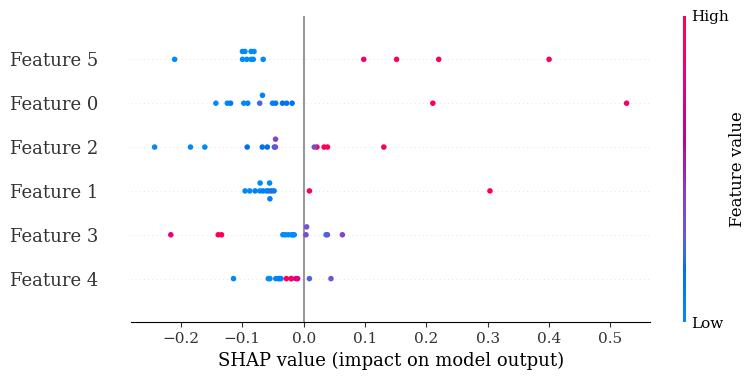

In [ ]:
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values,feature_names=X.columns, X_test_scaled)

In [229]:
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/KNN_shap_summary_plot.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.close()

In [226]:
#feat_names = list(Y.columns)
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
import matplotlib.pyplot as plt

shap.plots.violin(shap_values, features=X_test_scaled, feature_names=X.columns, max_display=10, plot_type="layered_violin")
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/KNN_shap_violin_plot.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.close()

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #0 for feature Retention Time, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #1 for feature Retention Time, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #2 for feature Retention Time, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #3 for feature Retention Time, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/l

### Predication Visualization

In [10]:
from joblib import load
GB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/GB_model.pkl"
GB_model = load(GB_model_path)
GB_model_pred = GB_model.predict(X_test_scaled)
CB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/CB_model.pkl"
CB_model = load(CB_model_path)
CB_model_pred = CB_model.predict(X_test_scaled)
AB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/AB_model.pkl"
AB_model = load(AB_model_path)
AB_model_pred = AB_model.predict(X_test_scaled)
LGBM_model_path = "/home/kumail/Energy_AI/Honey Model/Models/LGBM_model.pkl"
LGBM_model = load(LGBM_model_path)
LGBM_model_pred = LGBM_model.predict(X_test_scaled)
SVR_model_path = "/home/kumail/Energy_AI/Honey Model/Models/SVR_model.pkl"
SVR_model = load(SVR_model_path)
SVR_model_pred = SVR_model.predict(X_test_scaled)
XGB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/XGB_model.pkl"
XGB_model = load(XGB_model_path)
XGB_model_pred = XGB_model.predict(X_test_scaled)
KNN_model_path = "/home/kumail/Energy_AI/Honey Model/Models/KNN_model.pkl"
KNN_model = load(KNN_model_path)
KNN_model_pred = KNN_model.predict(X_test_scaled)
stacking_model_path = "/home/kumail/Energy_AI/Honey Model/Models/stacking_model_model.pkl"
stacking_model = load(stacking_model_path)
stacking_model_pred = stacking_model.predict(X_test_scaled)

In [230]:
Y_test

135    0.041
66     0.603
31     0.467
118    0.000
42     0.034
12     0.380
51     0.083
68     1.127
126    0.080
55     1.402
112    0.262
130    0.496
80     0.000
19     0.000
Name: HRI, dtype: float64

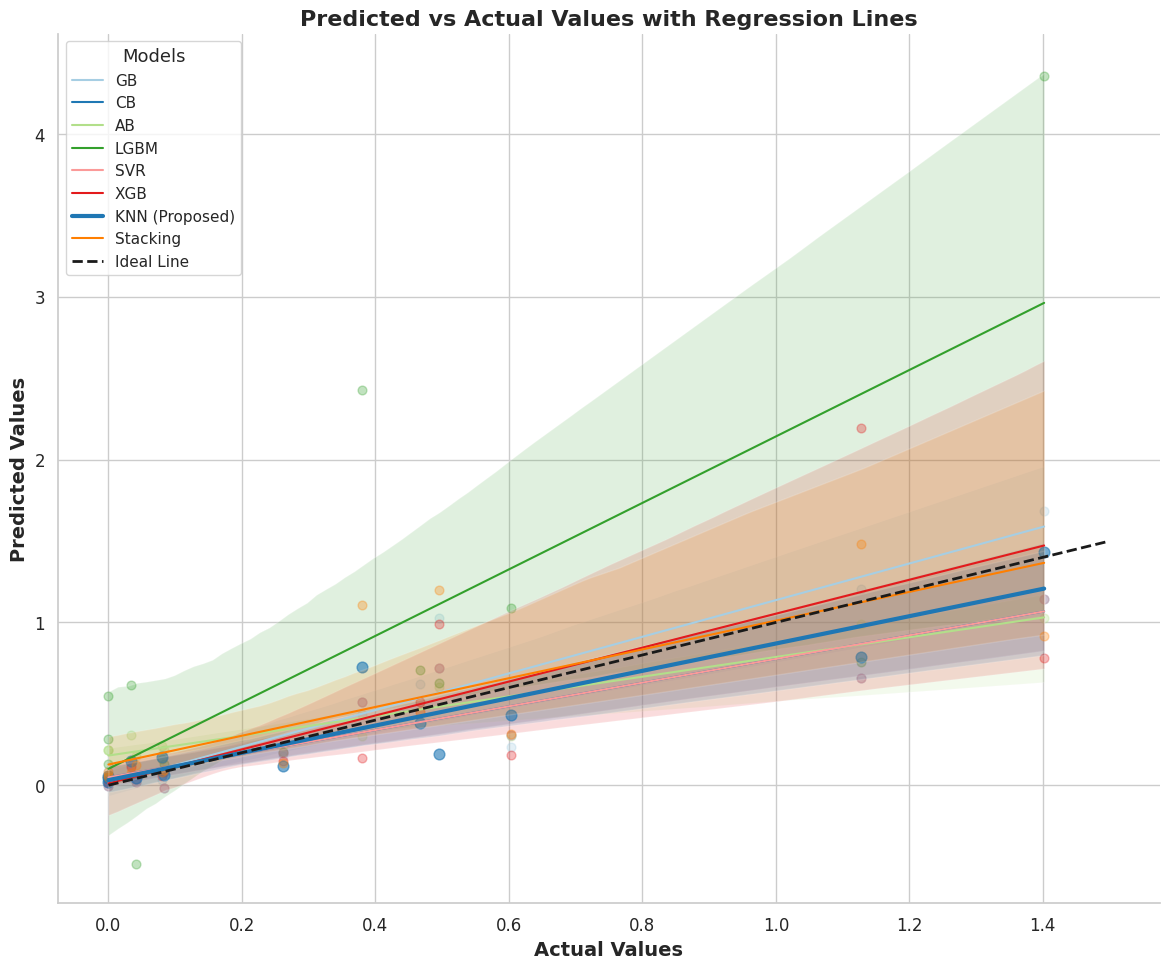

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from joblib import load

# Load all models
model_paths = {
    'GB': "/home/kumail/Energy_AI/Honey Model/Models/GB_model.pkl",
    'CB': "/home/kumail/Energy_AI/Honey Model/Models/CB_model.pkl",
    'AB': "/home/kumail/Energy_AI/Honey Model/Models/AB_model.pkl",
    'LGBM': "/home/kumail/Energy_AI/Honey Model/Models/LGBM_model.pkl",
    'SVR': "/home/kumail/Energy_AI/Honey Model/Models/SVR_model.pkl",
    'XGB': "/home/kumail/Energy_AI/Honey Model/Models/XGB_model.pkl",
    'KNN': "/home/kumail/Energy_AI/Honey Model/Models/KNN_model.pkl",
    'Stacking': "/home/kumail/Energy_AI/Honey Model/Models/stacking_model_model.pkl"
}

# Predict using loaded models
models, predictions = {}, {}
for name, path in model_paths.items():
    models[name] = load(path)
    predictions[name] = models[name].predict(X_test_scaled)

# Combine predictions with actual values
results_df = pd.DataFrame({'Actual': Y_test})
for name, preds in predictions.items():
    results_df[name] = preds

# Melt the dataframe for seaborn
results_melted = results_df.reset_index().melt(
    id_vars=['index', 'Actual'],
    value_vars=list(model_paths.keys()),
    var_name='Model',
    value_name='Predicted'
)

# Set style
sns.set(style="whitegrid", context="notebook", font_scale=1.4)
base_palette = sns.color_palette("Paired", len(model_paths))
highlight_color = '#1f77b4'  # Bold blue for KNN

# Begin plot
plt.figure(figsize=(12, 10))

for i, model in enumerate(model_paths.keys()):
    temp_df = results_melted[results_melted['Model'] == model]
    if model == 'KNN':
        # Proposed model: KNN highlighted
        sns.regplot(
            data=temp_df,
            x='Actual',
            y='Predicted',
            scatter_kws={'s': 60, 'alpha': 0.6, 'color': highlight_color},
            line_kws={'label': 'KNN (Proposed)', 'color': highlight_color, 'lw': 3},
            color=highlight_color
        )
    else:
        sns.regplot(
            data=temp_df,
            x='Actual',
            y='Predicted',
            scatter_kws={'s': 40, 'alpha': 0.3},
            line_kws={'label': model, 'color': base_palette[i], 'lw': 1.5},
            color=base_palette[i]
        )

# Ideal line
min_val = 0
max_val = 1.5
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Line')

# Labels and layout
plt.xlabel('Actual Values', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold')
plt.title('Predicted vs Actual Values with Regression Lines', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Professional legend
plt.legend(title='Models', title_fontsize=13, fontsize=11, frameon=True, loc='upper left')
sns.despine()
plt.tight_layout()

# Optional: save for publication
# plt.savefig("regression_comparison_highlight_knn.png", dpi=400)

plt.show()


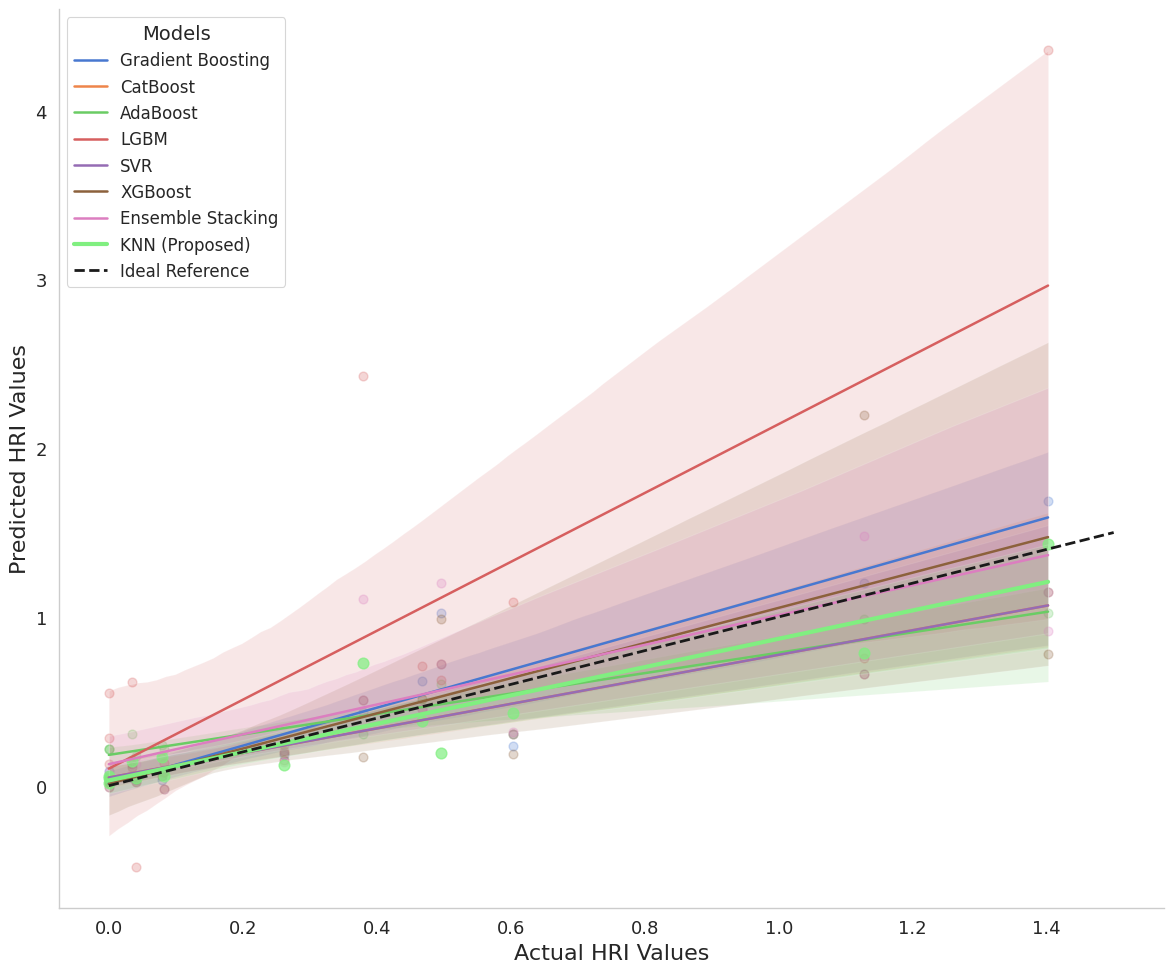

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from joblib import load

# Load models
model_paths = {
    'Gradient Boosting': "/home/kumail/Energy_AI/Honey Model/Models/GB_model.pkl",
    'CatBoost': "/home/kumail/Energy_AI/Honey Model/Models/CB_model.pkl",
    'AdaBoost': "/home/kumail/Energy_AI/Honey Model/Models/AB_model.pkl",
    'LGBM': "/home/kumail/Energy_AI/Honey Model/Models/LGBM_model.pkl",
    'SVR': "/home/kumail/Energy_AI/Honey Model/Models/SVR_model.pkl",
    'XGBoost': "/home/kumail/Energy_AI/Honey Model/Models/XGB_model.pkl",
    'Ensemble Stacking': "/home/kumail/Energy_AI/Honey Model/Models/stacking_model_model.pkl",
    'KNN': "/home/kumail/Energy_AI/Honey Model/Models/KNN_model.pkl"
    
}

# Predict
models, predictions = {}, {}
for name, path in model_paths.items():
    models[name] = load(path)
    predictions[name] = models[name].predict(X_test_scaled)

# Prepare results
results_df = pd.DataFrame({'Actual': Y_test})
for name, preds in predictions.items():
    results_df[name] = preds

# Melt for seaborn
results_melted = results_df.reset_index().melt(
    id_vars=['index', 'Actual'],
    value_vars=list(model_paths.keys()),
    var_name='Model',
    value_name='Predicted'
)

# Professional style
sns.set(style="whitegrid", context="paper", font_scale=1.6)
custom_palette = sns.color_palette("muted", len(model_paths))
highlight_color = '#80EF80'  # Deep professional blue for KNN

# Plot
plt.figure(figsize=(12, 10))

for i, model in enumerate(model_paths.keys()):
    temp_df = results_melted[results_melted['Model'] == model]
    if model == 'KNN':
        sns.regplot(
            data=temp_df,
            x='Actual',
            y='Predicted',
            scatter_kws={'s': 60, 'alpha': 0.7, 'color': highlight_color},
            line_kws={'label': 'KNN (Proposed)', 'color': highlight_color, 'lw': 3},
            color=highlight_color
        )
    else:
        sns.regplot(
            data=temp_df,
            x='Actual',
            y='Predicted',
            scatter_kws={'s': 40, 'alpha': 0.25},
            line_kws={'label': model, 'color': custom_palette[i], 'lw': 1.8},
            color=custom_palette[i]
        )

# Ideal Line
min_val = 0
max_val = 1.5
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Reference')

# Labeling
plt.xlabel('Actual HRI Values', fontsize=16)
plt.ylabel('Predicted HRI Values', fontsize=16)

# Ticks
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Legend
plt.legend(
    title='Models',
    title_fontsize=14,
    fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=False,
    loc='upper left'
)

# Final touches
sns.despine()
plt.grid(False)
plt.tight_layout()

# Save high-res
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/regression_comparison.tiff", format='tiff', dpi=300, bbox_inches='tight')

plt.show()


### Bar Chart

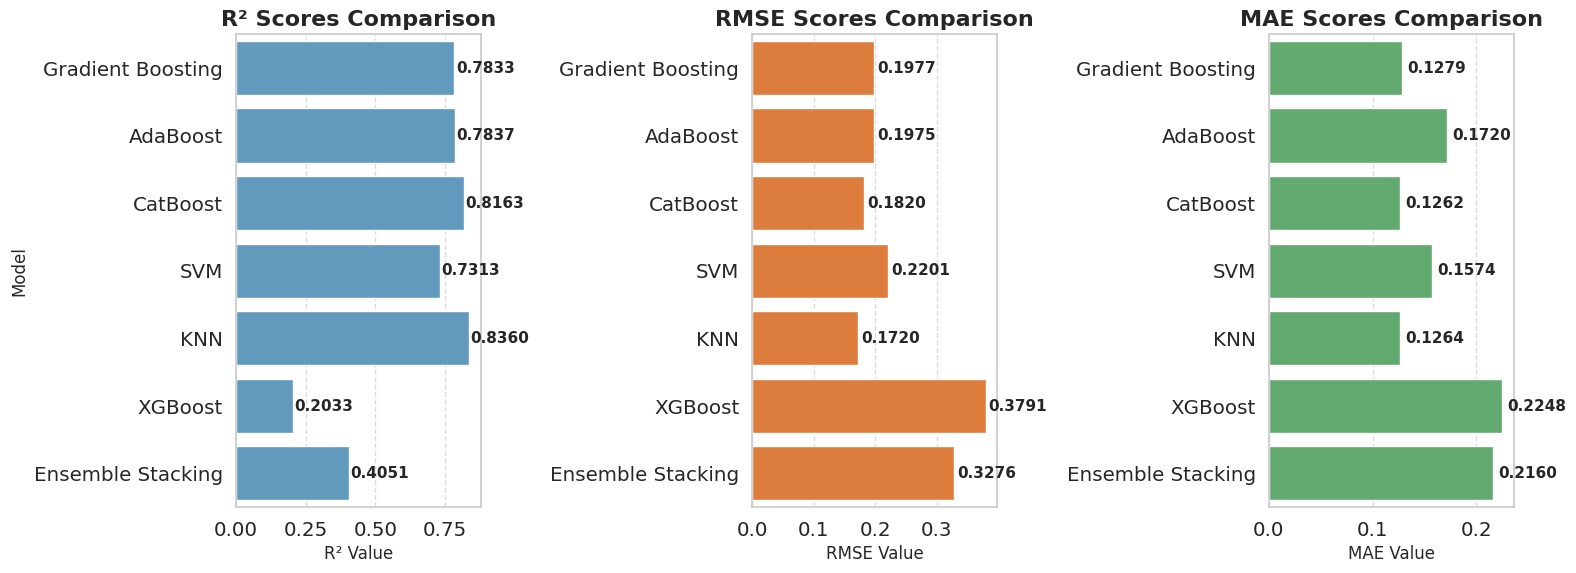

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the models and metrics
models = ['Gradient Boosting', 'AdaBoost', 'CatBoost', 'SVM', 'KNN', 'XGBoost', 'Ensemble Stacking']
r2_scores = [0.7833, 0.7837, 0.8163, 0.7313, 0.8360, 0.2033, 0.4051]
rmse_scores = [0.1977, 0.1975, 0.1820, 0.2201, 0.1720, 0.3791, 0.3276]
mae_scores = [0.1279, 0.1720, 0.1262, 0.1574, 0.1264, 0.2248, 0.2160]

# Create a DataFrame to organize the data
data = {
    'Model': models,
    'R²': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
}
df = pd.DataFrame(data)

# Set up the plot aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.3)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot R² scores with customized aesthetics
sns.barplot(x='R²', y='Model', data=df, ax=axes[0], color=sns.color_palette("Blues")[3])
axes[0].set_title('R² Scores Comparison', fontsize=16, fontweight='bold')
axes[0].set_xlabel('R² Value', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)
axes[0].grid(True, axis='x', linestyle='--', alpha=0.7)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():.4f}', (p.get_width() + 0.005, p.get_y() + p.get_height() / 2),
                     va='center', ha='left', fontsize=11, fontweight='bold')

# Plot RMSE scores with customized aesthetics
sns.barplot(x='RMSE', y='Model', data=df, ax=axes[1], color=sns.color_palette("Oranges")[3])
axes[1].set_title('RMSE Scores Comparison', fontsize=16, fontweight='bold')
axes[1].set_xlabel('RMSE Value', fontsize=12)
axes[1].set_ylabel('')
axes[1].grid(True, axis='x', linestyle='--', alpha=0.7)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.4f}', (p.get_width() + 0.005, p.get_y() + p.get_height() / 2),
                     va='center', ha='left', fontsize=11, fontweight='bold')

# Plot MAE scores with customized aesthetics
sns.barplot(x='MAE', y='Model', data=df, ax=axes[2], color=sns.color_palette("Greens")[3])
axes[2].set_title('MAE Scores Comparison', fontsize=16, fontweight='bold')
axes[2].set_xlabel('MAE Value', fontsize=12)
axes[2].set_ylabel('')
axes[2].grid(True, axis='x', linestyle='--', alpha=0.7)
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_width():.4f}', (p.get_width() + 0.005, p.get_y() + p.get_height() / 2),
                     va='center', ha='left', fontsize=11, fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


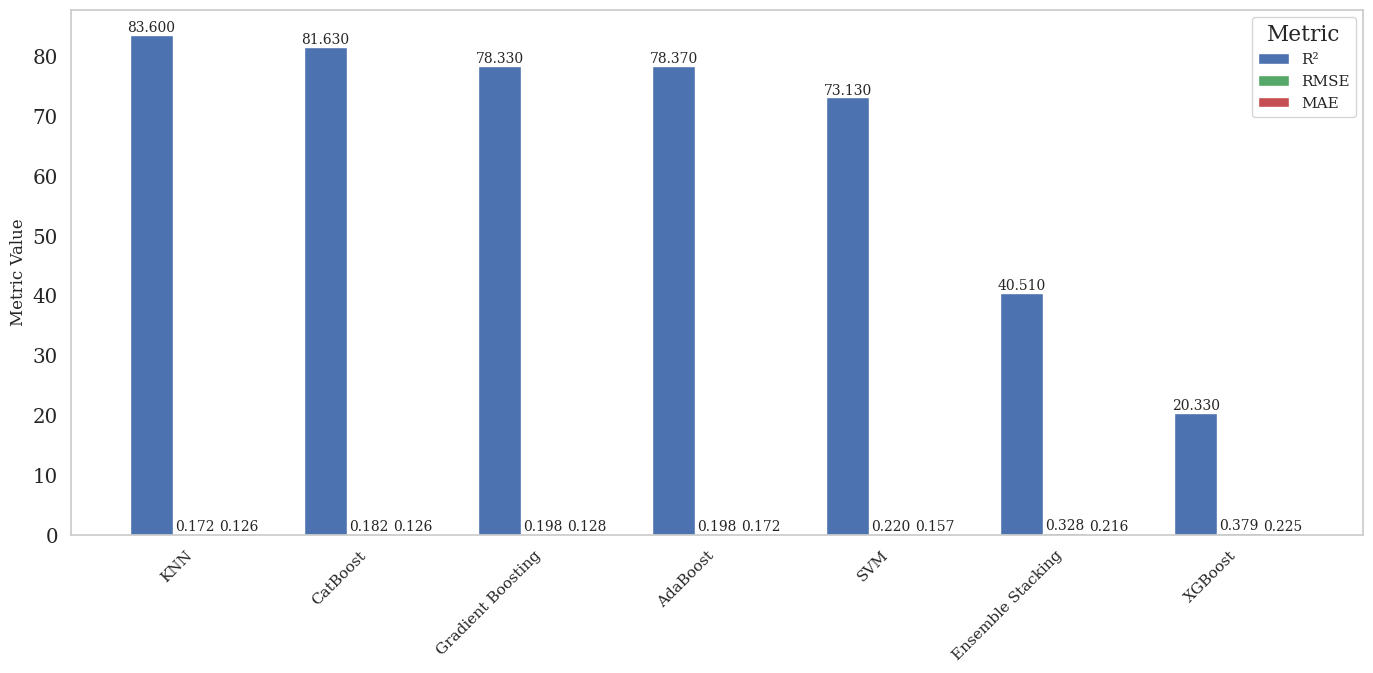

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['KNN','CatBoost','Gradient Boosting', 'AdaBoost',  'SVM',  'Ensemble Stacking','XGBoost']
r2_scores = [83.60, 81.63, 78.33, 78.37,  73.13, 40.51,  20.33]
rmse_scores = [0.1720,  0.1820, 0.1977, 0.1975, 0.2201, 0.3276,  0.3791]
mae_scores = [0.1264, 0.1262,0.1279, 0.1720,  0.1574, 0.2160,  0.2248]

# Bar width and position
x = np.arange(len(models))
bar_width = 0.25

# Set up figure
plt.figure(figsize=(14, 7))

# Plotting
plt.bar(x - bar_width, r2_scores, width=bar_width, label='R²', color='#4C72B0')
plt.bar(x, rmse_scores, width=bar_width, label='RMSE', color='#55A868')
plt.bar(x + bar_width, mae_scores, width=bar_width, label='MAE', color='#C44E52')

# Titles and labels
plt.xticks(x, models, rotation=45, ha='right', fontsize=11)
plt.ylabel('Metric Value', fontsize=12)
plt.grid(False)
plt.legend(title='Metric', fontsize=11)

# Annotate bars
def annotate_bars(x_positions, values):
    for x_val, val in zip(x_positions, values):
        plt.text(x_val, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontsize=10)

annotate_bars(x - bar_width, r2_scores)
annotate_bars(x, rmse_scores)
annotate_bars(x + bar_width, mae_scores)

plt.tight_layout()
plt.show()


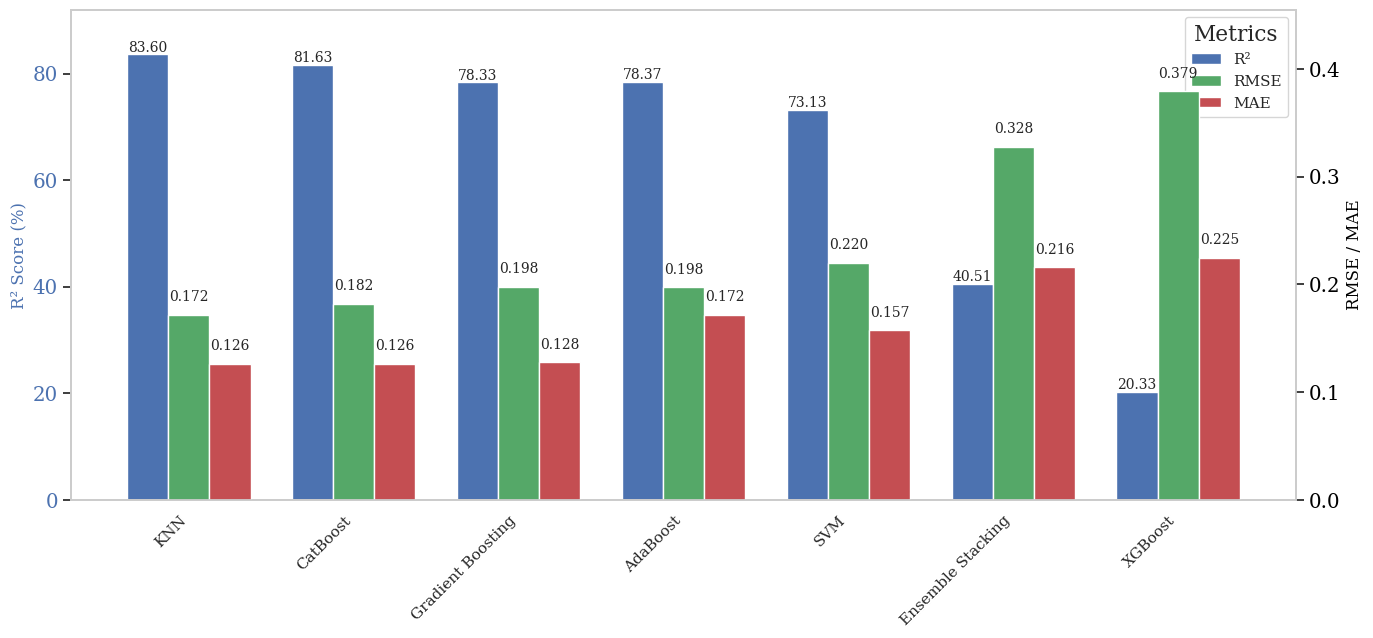

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['KNN','CatBoost','Gradient Boosting', 'AdaBoost',  'SVM',  'Ensemble Stacking','XGBoost']
r2_scores = [83.60, 81.63, 78.33, 78.37,  73.13, 40.51,  20.33]
rmse_scores = [0.1720,  0.1820, 0.1977, 0.1975, 0.2201, 0.3276,  0.3791]
mae_scores = [0.1264, 0.1262,0.1279, 0.1720,  0.1574, 0.2160,  0.2248]

# Setup
x = np.arange(len(models))
bar_width = 0.25
fig, ax1 = plt.subplots(figsize=(14, 7))

# Primary y-axis (left) for R²
bars1 = ax1.bar(x - bar_width, r2_scores, width=bar_width, label='R²', color='#4C72B0')
ax1.set_ylabel('R² Score (%)', fontsize=12, color='#4C72B0')
ax1.tick_params(axis='y', labelcolor='#4C72B0')
ax1.set_ylim(0, max(r2_scores) * 1.1)

# Secondary y-axis (right) for RMSE & MAE
ax2 = ax1.twinx()
bars2 = ax2.bar(x, rmse_scores, width=bar_width, label='RMSE', color='#55A868')
bars3 = ax2.bar(x + bar_width, mae_scores, width=bar_width, label='MAE', color='#C44E52')
ax2.set_ylabel('RMSE / MAE', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(max(rmse_scores), max(mae_scores)) * 1.2)

# X-axis
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=11)

# Title and layout
#fig.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Annotations
def annotate(bars, ax, fmt='%.2f'):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, fmt % height,
                ha='center', va='bottom', fontsize=10)
ax1.grid(False)
ax2.grid(False)
annotate(bars1, ax1, fmt='%.2f')
annotate(bars2, ax2, fmt='%.3f')
annotate(bars3, ax2, fmt='%.3f')

# Legend (combine both axes)
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(handles, labels, title='Metrics', fontsize=11, loc='upper right')
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/Models_comparison.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.show()
